# Code

In [1]:
#import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random
sns.set_theme(style="ticks", color_codes=True)

# Aim
The aim of the model is to predict how much sales will be achieved with a certain campaign depending on how much money has been invested in different communication channels. It shows which channel is most effective for driving sales and should help the marketing department decide how to better distribute their budget for future campaigns. Furthermore, the prediction of sales allows better planning and forecasting the demand and website traffic after a certain campaign based on how much money was spent on it on different channels. Each row stands for one campaign.

## Data
The original source is from kaggle: https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data. The column names were changed to better fit the defined use case and company. In order to increase the complexity and to obtain a more realistic data set, the column "TV" will be dropped, as the original dataset has an 1:1 linear correlation with the target variable sales. Each row represents one campaign, which was played in either one (european) country or across different countries.
* Print: Money spent on Print advertising (in thousands)
* Social: Money spent for social media advertising (influencer marketing excluded) (in thousands)
* Influencer: Size and reach of the influencer worked with in the campaign
* Sales: Sales during the term of a campaign (in thousands)

# Import data

In [2]:
df = pd.read_csv('../Regression_marketing_data.csv', delimiter=',')

## Drop TV column

In [3]:
#drop TV column for test
df=df.drop('TV', axis=1)

## First look into the data

In [4]:
#first look into the data
df.head()

,Print,Social,Influencer,Sales
0,6.566231,2.907983,Mega,54.732757
1,9.237765,2.409567,Mega,46.677897
2,15.886446,2.913410,Mega,150.177829
3,30.020028,6.922304,Mega,298.246340
4,8.437408,1.405998,Micro,56.594181


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Print       4568 non-null   float64
 1   Social      4566 non-null   float64
 2   Influencer  4572 non-null   object 
 3   Sales       4566 non-null   float64
dtypes: float64(3), object(1)
memory usage: 143.0+ KB


# Data Preparation

In [6]:
#change data type
df['Influencer']=df['Influencer'].astype('category')

## Check missing values

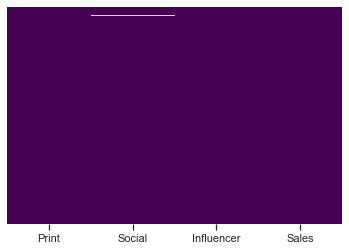

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [8]:
df.isnull().sum()

Print         4
Social        6
Influencer    0
Sales         6
dtype: int64

### Fill missing values
The missing values of the Print and Social Media column are probably a result from campaigns, which were not played on the channel. Therefore, we will keep these rows and replace the NaN values with 0. 

In [9]:
#fill missing values of channel column
df['Print'].fillna(0, inplace=True)
df['Social'].fillna(0, inplace=True)

In [10]:
# all remaining rows with NA-values in any column
df[df.isnull().any(axis=1)]

,Print,Social,Influencer,Sales
208,25.598379,5.514787,Nano,NaN
214,36.466753,5.635992,Mega,NaN
221,24.220634,0.285898,Micro,NaN
226,8.726783,0.497838,Mega,NaN
231,6.809752,0.011451,Macro,NaN
236,1.384415,2.398129,Nano,NaN


### Drop missing values
We will drop the remaining NULL-values in our target variable.

In [11]:
df = df.dropna(subset=['Sales'])

### Add column Total_spent
We will calculate the total amount spent per campaign (Sum of all channels) to identify if there is a correlation between the total sum and our target variables sales.

In [12]:
#Create column
df['Total_spent']=df['Print']+df['Social']

In [13]:
df.head()

,Print,Social,Influencer,Sales,Total_spent
0,6.566231,2.907983,Mega,54.732757,9.474214
1,9.237765,2.409567,Mega,46.677897,11.647332
2,15.886446,2.913410,Mega,150.177829,18.799856
3,30.020028,6.922304,Mega,298.246340,36.942332
4,8.437408,1.405998,Micro,56.594181,9.843406


# Data splitting
Before we dive deeper into the data, we already divide the dataset into trainings- and test-data. This prevents overfitting the model to the conditions in the test/validation dataset and gives us the opportunity to evaluate our model unbiased and under real conditions. 

In [14]:
#Train test split
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

# Data Exploration
The data exploration will be performed with our test dataset.
* On average we spent 18.14 Million € for Print and only 3.33 Million € for Social Media.
* For our most expensive campaign we spent 57.16 Million €.
* On average we spent 21.47 Million € in total for one campaign.

In [15]:
train_df.describe()

,Print,Social,Sales,Total_spent
count,3653.000000,3653.000000,3653.000000,3653.000000
mean,18.148261,3.331223,192.504898,21.479484
std,9.687832,2.225839,92.851664,11.178079
min,0.000000,0.000000,31.199409,0.206238
25%,10.403711,1.524062,112.345307,12.351913
50%,17.898432,3.057987,189.932495,20.961877
75%,25.521124,4.824378,271.547402,29.932481
max,48.871161,13.981662,364.079751,57.163369


## Correlation
In order to get a first glimpse about the correlation between the features and our target variable **Sales**, we create a heatmap and pairplot.

<AxesSubplot:>

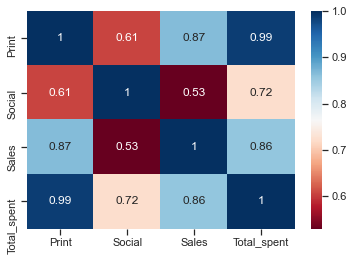

In [16]:
#heatmap for correlation between the numerical variables
sns.heatmap(train_df.corr(), annot=True, cmap='RdBu')

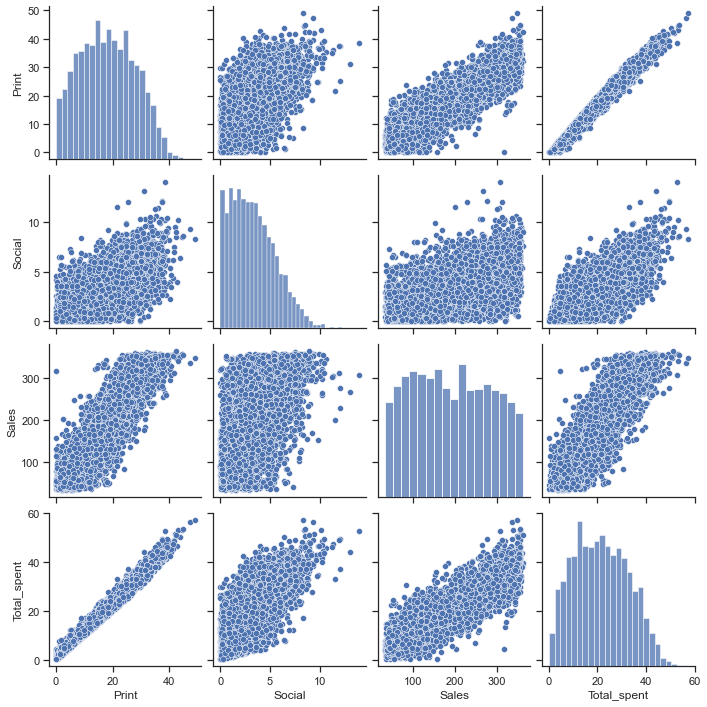

In [17]:
#pairplot of numerical variables
sns.pairplot(train_df)

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

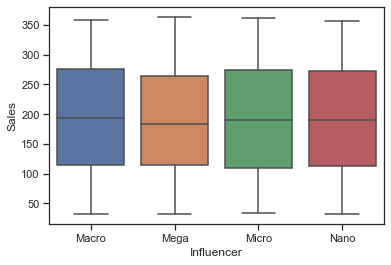

In [18]:
# check correlation with categorical variables
sns.boxplot(x='Influencer',y='Sales', data=train_df)

### Learnings
* There is a strong positive correlation between Total amount spent and the two channels. That's because the total amount is a result from these two features.
* The spendings for *social media* is right skewed, which means that we have some higher values on the right end of the distribution.
* The heatmap and the pairplot reveal a strong, positive and linear correlation between our target variable **sales**, money spent for *Print* (Correlation Coefficient: 0.87) and total amount spent (Correlation Coefficient: 0.86).
* There is also a medium, positive correlation between the *social media* channel and our target variable. (Correlation Coefficient: 0.53) It seems like all campaign gather in the area below a line which serves as a kind of limit.
* Surprisingly, the boxplots show only little difference in sales for different influencer sizes. This would mean that working with micro or even nano influencers is just as efficient as working with large influencers as it generates similar sales.
* However, since we don't have any info on how many influencers we worked with per campaign and how much money we spent on them, we can't say whether working with nano-influencers is more profitable.

# Modeling
Because of the strong correlation of *Print* and **Sales** we will try a simple, linear regression model and compare it with a multi, linear regression model as well as with a lasso regression and XGBoost algorithm. Firstly, we will create a pipeline including different Pre-Processing steps as well as the Regression algorithm. In addition, we will create a dictionary to collect all scores and define a function to calculate the adjusted r2-score.

In [19]:
#Pre-Processing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Pipeline/Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor

#Score
from sklearn.metrics import r2_score

In [20]:
# dictionary to save all scores
scores = {}

# function for adjusted R2
def adj_r2(r2, y, X):
    adj_r2 = 1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adj_r2

## Pipeline for Pre-Processing

In [21]:
# Data preprocessing pipeline

# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    #Standardize data to compensate different ranges of the features (also Lasso Regression works best when all numerical data is distributed around 0)
    ('scaler', StandardScaler())
    ])

# for categorical features  
categorical_transformer = Pipeline(steps=[
    #OneHotEncoder firstly replaces each category with a number.
    #After that, it creates a binary column for each category and returns a matrix (0=wrong category, 1=right category), because the categorical variable, unlike the integer variable, has no natural order.
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

## Pipeline for modeling

In [22]:
pipe=Pipeline([
                ('preprocessor', preprocessor),
                ('chi', SelectKBest(k='all')),
                ('lm', LinearRegression())
              ])
#pipe.get_params().keys()

## Simple linear Regression
As there is a positive correlation between our target variable and the total amount spent, we will create a basic simple linear regression model with the two variables *Total_spent* and *sales*. In this way we can predict how much sales we can expect based on how much money we spent on a certain campaign. This way, the marketing department can justify its budget and check whether the campaign is achieving the expected effect.
### Prepare Features and target variable

In [23]:
# Train-Data
# Select features for simple regression
features = ['Total_spent']
A_train = train_df[features]

# Create response
b_train = train_df['Sales']

# Test-Data
# Select features for simple regression
A_test = test_df[features]

# Create response
b_test = test_df['Sales']

In [24]:
A_test.min()

Total_spent    0.459982
dtype: float64

### Fit data

In [25]:
model_simple = pipe.fit(A_train, b_train)

/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [26]:
b_pred = model_simple.predict(A_train)

### Evaluation with train-data
We already achieve a solid r2 and adjustend r2 score with the simple model. We can explain about **73%** of the dispersion around the mean with the model. We obtain similar values in cross-validation. This means that also with resampling our data, the model retains a similar quality.

In [27]:
#print r2 scores and save in df
print(r2_score(b_train, b_pred))
print (adj_r2(r2_score(b_train, b_pred), b_train, A_train))
print(cross_val_score(model_simple, A_train, b_train, scoring='r2', cv=5))

#asve scores in dictionary
scores['model_simple']=[r2_score(b_train, b_pred), adj_r2(r2_score(b_train, b_pred), b_train, A_train)]

0.7347491426154187
0.7346764910521799


/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


[0.73851868 0.7273026  0.7346638  0.74064071 0.73166662]


/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


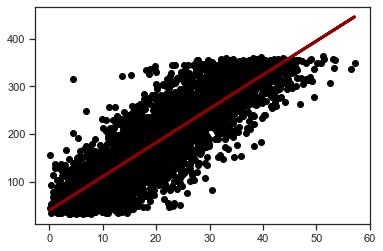

In [28]:
# Plot outputs
plt.scatter(A_train, b_train,  color='black')
plt.plot(A_train, b_pred, color='darkred', linewidth=3);

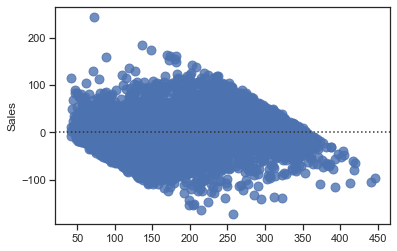

In [29]:
sns.residplot(x=b_pred, y=b_train, scatter_kws={"s": 80});

The plots reveal a relatively equal deviation. The line fits appropriately in the scatterplot and is not affected by outliers. However, this simple model gives no insight into how the budget should be distributed among the different channels. Therefore, we will now develop further models, which consider the information divided by channels and influencer type.

## Multiple linear Regression
### Prepare Features and target variable
As all numerical features have a medium to strong correlation with our target variable **sales** we will include all features into our multiple regression model. We will also include the categorial variable *Influencer* in our featureset and test its impact. We assume only a low impact of this variable, because it didn't show a significant correlation with the target variable in the boxplot. In the hyperparameter tuning we will test different feature selections by application of SelectKBest().

In [30]:
# Train-Data
# Select features for multiple regression
X_train = train_df.drop(['Total_spent','Sales'], axis=1)

# Create response
y_train = train_df['Sales']

# Test-Data
# Select features for simple regression
X_test = test_df.drop(['Total_spent','Sales'], axis=1)

# Create response
y_test = test_df['Sales']

### Fit Data
#### Standard multiple regression

In [31]:
model_multi = pipe.fit(X_train, y_train)

/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [32]:
y_pred = model_multi.predict(X_train)

In [33]:
print(r2_score(y_train, y_pred))

0.7522751246935171


#### Perform Hyperparameter tuning
We want to test if we could improve the performance by hyperparameter tuning.

In [34]:
#Hyperparameter tuning
params={
    'chi__k' : [1,2,3,4,5, 'all'],
    'lm__fit_intercept':[True,False], 
    'lm__normalize':[True,False], 
    'lm__copy_X':[True, False]
    # max_iter: Maximale Anzahl an Durchläufen, tol=Beenden des Durchlaufs, sobald man nahe genug an bestimmtem Wert ist
    
}
# Erstellung der GridSearch
gs=GridSearchCV(estimator=pipe,param_grid=params, n_jobs=-1,cv=5)

# Model wird trainiert
model_multi_tuned = gs.fit(X_train, y_train)

# Ausgabe der besten Parameter
model_multi_tuned.best_params_

/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


{'chi__k': 'all',
 'lm__copy_X': True,
 'lm__fit_intercept': True,
 'lm__normalize': False}

In [35]:
y_pred_tuned=model_multi_tuned.predict(X_train)

### Evaluate data with trainings-set

In [36]:
#print r2 scores and save in dictionary
print ('Multiple regression without hyperparameter tuning: ')
print(r2_score(y_train, y_pred))
print (adj_r2(r2_score(y_train, y_pred), y_train, X_train))
#print(cross_val_score(model_multi, X_train, y_train, scoring='r2', cv=5))

print ('Multiple regression with hyperparameter tuning: ')
print(r2_score(y_train, y_pred_tuned))
print (adj_r2(r2_score(y_train, y_pred_tuned), y_train, X_train))
#print(cross_val_score(model_multi_tuned, X_train, y_train, scoring='r2', cv=5))

#Add to dictionary
scores['model_multi']=[r2_score(y_train, y_pred), adj_r2(r2_score(y_train, y_pred), y_train, X_train)]
scores['model_multi_tuned']=[r2_score(y_train, y_pred_tuned), adj_r2(r2_score(y_train, y_pred_tuned), y_train, X_train)]

Multiple regression without hyperparameter tuning: 
0.7522751246935171
0.7520714594082555
Multiple regression with hyperparameter tuning: 
0.7522751246935171
0.7520714594082555


As the tuning of the multiple linear model has no effect and returns the standard parameter, we will evaluate the residplot with the non-tuned variant.

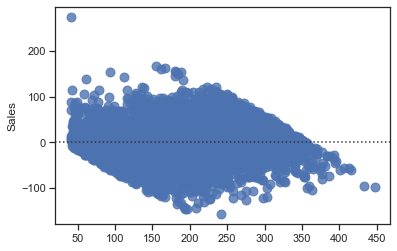

In [37]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

## Lasso Regression
Although the correlation plots show a mainly linear correlation we will try if we can improve the model score by applying the lasso Regression Algorithm.

### Find best alpha

In [38]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
best_alpha = pipe.set_params(lm = LassoCV(cv=5, random_state=0, max_iter=10000))

In [39]:
# Fit model
best_alpha.fit(X_train, y_train)

/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf2b92e760>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.m

In [40]:
best_alpha['lm'].alpha_

0.5680379551613485

### Perform Modeling

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso=pipe.set_params(lm = Lasso(alpha=best_alpha['lm'].alpha_))
model_lasso = lasso.fit(X_train, y_train)

/Users/sophiaengstler/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [43]:
print(model_lasso.score(X_train,y_train))

0.7521661193754694


In [44]:
scores['model_lasso']=[model_lasso.score(X_train, y_train), adj_r2(model_lasso.score(X_train, y_train), y_train, X_train)]

In [45]:
#Show model coefficients and names
print(list(zip(model_lasso['lm'].coef_, X_train)))

[(79.79394314732825, 'Print'), (0.2602741271073183, 'Social'), (0.0, 'Influencer')]


## Gradient Boosting Regressor
We will also test the performance of the gradient boosting regressor as it has shown to be very effective. It combines the estimates of a set of simpler, weaker models in order to iteratively create a more accurate model. It uses a gradient descent algorithm to minimize the loss when adding new models.

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
}

In [64]:
#ignore warning for dividing through zero, reason: some campaigns focused on only one channel and have 0 € budget for Print or Social channel
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [66]:
#xgb benötigt array
xgb=pipe.set_params(lm = GradientBoostingRegressor(**params))
model_xgb = xgb.fit(X_train, y_train)

In [67]:
model_xgb.predict(X_train)

array([244.04091215, 233.55420311, 249.55457967, ...,  72.83820264,
        93.30763014, 196.59507722])

In [68]:
print(model_xgb.score(X_train,y_train))

0.7883465944901054


In [69]:
scores['model_xgb']=[model_xgb.score(X_train, y_train), adj_r2(model_xgb.score(X_train, y_train), y_train, X_train)]

### Feature Importance

In [70]:
reg=model_xgb['lm']
reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [77]:
X_train['Influencer'].unique()

['Nano', 'Macro', 'Micro', 'Mega']
Categories (4, object): ['Nano', 'Macro', 'Micro', 'Mega']

The Feature Importance is given for each expression of the categorical variable. Therefore, we have 6 instead of 3 feature importances.

In [71]:
reg.feature_importances_

array([9.88744359e-01, 9.61831323e-03, 3.41917727e-04, 5.49632412e-04,
       2.23553659e-04, 5.22223908e-04])

Text(0.5, 1.0, 'Feature Importance (MDI)')

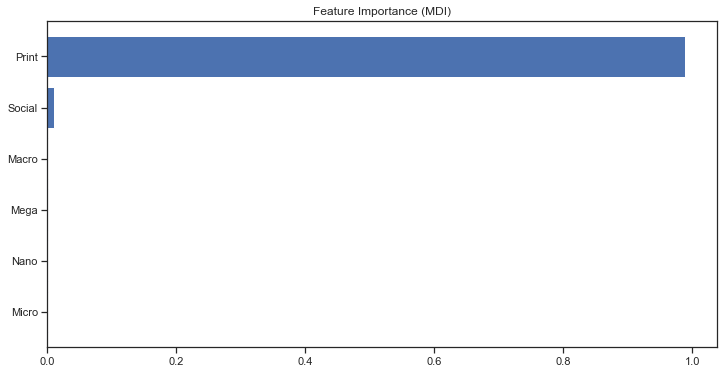

In [86]:
#plot feature importance
from sklearn.inspection import permutation_importance

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['Print', 'Social', 'Nano', 'Macro', 'Micro', 'Mega'])[sorted_idx])
plt.title("Feature Importance (MDI)")


The plot reveals that *Print* has by far the highest impact on our model prediction. This is due to the fact that there is also a significantly higher correlation between the feature and our target variable. The categorical variable Influencer, on the other hand, has little to no influence on the model. This was expected as the boxplots showed a mostly even distribution in the dataframe.

## Comparing the different models
The multi regression model with all features generated a slightly higher r2-score as our simple regression model. Also, the adjusted R2 score is higher, which means that even with a higher complexity and more features, the model has a better performans than the simple one. However, as mentioned before we couldn't improve the quality of our multi regression model by hyperparameter tuning.<br></br>
The correlation plots revealed a linear distribution. Therefore, we couldn't improve our scores with the Lasso algorithm. <br></br>
The highest r2 and adjusted r2-score was achieved with the XGBoost algorithm. 
Therefore, we decide to use the **Gradient Boosting Tree Regression Model** and test its performance on our test dataset.

In [73]:
# Print all scores
df_score=pd.DataFrame.from_dict(scores, orient='index', columns=['R2', 'Adjusted R2'])
df_score

,R2,Adjusted R2
model_simple,0.734749,0.734676
model_multi,0.752275,0.752071
model_multi_tuned,0.752275,0.752071
model_lasso,0.752166,0.751962
model_xgb,0.788347,0.788173


# Evaluation with Test-Data

In [74]:
y_test_pred = model_xgb.predict(X_test)

In [75]:
print ('XGBoost Regressor without hyperparameter tuning: ')
print(r2_score(y_test, y_test_pred))
print (adj_r2(r2_score(y_test, y_test_pred), y_test, X_test))

XGBoost Regressor without hyperparameter tuning: 
0.7556727890248547
0.7548664285925935


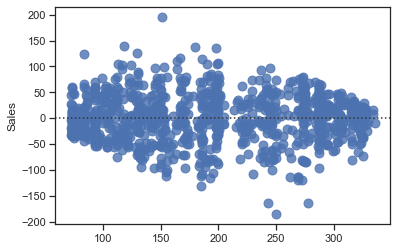

In [76]:
sns.residplot(x=y_test_pred, y=y_test, scatter_kws={"s": 80});

The application of the model shows a similar result to the performance with our trainings-dataset. Therefore, it is probably neither over- or underfitted.

# Conclusion
* The model explains around 75-78% of the deviation of the values.
* By knowing how much money we spent for a certain campaign, we can now predict, how much sales we will generate.
* This can help to check, whether a campaign has achieved the expected result or performed comparatively poorly or above average. 
* Additionally, we can now predict website traffic and demand based on our campaigns to take certain precautions.
* Feature importance has shown that spendings on Print have the biggest impact. One reason for this could be that spending on this channel is higher than on the other channel.
* The Influencer type we work with in a social media campaign showed low to zero impact on our sales.